### TASK 1 - Constructing the biomedical knowledge graph: 

In [3]:
import pandas as pd
import networkx as nx

# Loading the node data
nodes_df = pd.read_csv('hetionet-v1.0-nodes.tsv', sep='\t', header=0, names=['ID', 'Name', 'Kind'])

# Loading the edge data
edges_df = pd.read_csv('edges.sif', sep='\t', header=0, names=['Source', 'Metaedge', 'Target'])

#Creating the Graph
G = nx.MultiDiGraph()

#Adding nodes with ID as the node identifier
for _, row in nodes_df.iterrows():
    G.add_node(row['ID'], name=row['Name'], kind=row['Kind'])

# Adding edges
for _, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'], type=row['Metaedge'])

# G is our graph structure containing nodes with their attributes and the edges between them

In [4]:
# Counting different types for nodes
node_kind = {node_attrs['kind'] for _, node_attrs in G.nodes(data=True)}

# Counting different types for edges
edge_types = {edge_attrs['type'] for _, _, edge_attrs in G.edges(data=True)}

# Creating H as the direct graph
H = G.to_directed()

print("Different types for nodes:", len(node_kind))
print("Different types for edges:", len(edge_types))

Different types for nodes: 11
Different types for edges: 24


### TASK 2 - Analyzing the biomedical knowledge graph:

In [5]:
# Counting nodes associated with each kind
node_counts = {}
for node, node_attrs in G.nodes(data=True):
    node_kind = node_attrs['kind']
    if node_kind not in node_counts:
        node_counts[node_kind] = 1
    else:
        node_counts[node_kind] += 1

# Counting edges associated with each type
edge_counts = {}
for _, _, edge_attrs in G.edges(data=True):
    edge_type = edge_attrs['type']
    if edge_type not in edge_counts:
        edge_counts[edge_type] = 1
    else:
        edge_counts[edge_type] += 1


#Here we list the Total Number of Entities for Each Unique Kind
print("Nodes associated with each kind:")
for node_kind, count in node_counts.items():
    print(f"{node_kind}: {count}")

print("\nEdges associated with each type:")
for edge_type, count in edge_counts.items():
    print(f"{edge_type}: {count}")

Nodes associated with each kind:
Anatomy: 402
Biological Process: 11381
Cellular Component: 1391
Compound: 1552
Disease: 137
Gene: 20945
Molecular Function: 2884
Pathway: 1822
Pharmacologic Class: 345
Side Effect: 5734
Symptom: 438

Edges associated with each type:
AdG: 102240
AeG: 526407
AuG: 97848
CrC: 6486
CtD: 755
CbG: 11571
CuG: 18756
CcSE: 138944
CdG: 21102
CpD: 390
DdG: 7623
DpS: 3357
DlA: 3602
DrD: 543
DaG: 12623
DuG: 7731
GiG: 147164
GpCC: 73566
GpBP: 559504
GcG: 61690
GpMF: 97222
GpPW: 84372
Gr>G: 265672
PCiC: 1029


In [6]:
# H is our directed graph
from collections import defaultdict

# Initializing dictionaries to sum degrees and count nodes for each kind
in_degrees = defaultdict(int)
out_degrees = defaultdict(int)
counts = defaultdict(int)

for node, attrs in H.nodes(data=True):
    node_kind = attrs['kind']
    counts[node_kind] += 1
    in_degrees[node_kind] += H.in_degree(node)
    out_degrees[node_kind] += H.out_degree(node)

# Calculating and printing average in/out-degrees
avg_in_degrees = {node_kind: in_deg / counts[node_kind] for node_kind, in_deg in in_degrees.items()}
avg_out_degrees = {node_kind: out_deg / counts[node_kind] for node_kind, out_deg in out_degrees.items()}

print("Average In-Degree for each node kind:")
for node_kind, avg_in in avg_in_degrees.items():
    print(f"{node_kind}: {avg_in}")

print("\nAverage Out-Degree for each node kind:")
for node_kind, avg_out in avg_out_degrees.items():
    print(f"{node_kind}: {avg_out}")

Average In-Degree for each node kind:
Anatomy: 8.960199004975124
Biological Process: 49.16123363500571
Cellular Component: 52.887131560028756
Compound: 4.842139175257732
Disease: 12.321167883211679
Gene: 61.1328240630222
Molecular Function: 33.71081830790569
Pathway: 46.30735455543359
Pharmacologic Class: 0.0
Side Effect: 24.231600976630624
Symptom: 7.664383561643835

Average Out-Degree for each node kind:
Anatomy: 1807.2014925373135
Biological Process: 0.0
Cellular Component: 0.0
Compound: 127.5798969072165
Disease: 258.97080291970804
Gene: 61.55120553831463
Molecular Function: 0.0
Pathway: 0.0
Pharmacologic Class: 2.982608695652174
Side Effect: 0.0
Symptom: 0.0


### ANALYSIS:

For each “Disease” compute the number of connections (in-degree and out-degree) 
and show the most connected diseases. 

In [7]:
# Initialize dictionaries to store in-degree and out-degree for diseases
disease_connections = defaultdict(lambda: {'in': 0, 'out': 0})

# Here for each disease we find in and out degree
for node, attrs in H.nodes(data=True):
    if attrs['kind'] == 'Disease':
        disease_connections[node]['in'] = H.in_degree(node)
        disease_connections[node]['out'] = H.out_degree(node)

# and then we sort diseases by in-degree and out-degree
most_connected_by_in_degree = sorted(disease_connections.items(), key=lambda x: x[1]['in'], reverse=True)
most_connected_by_out_degree = sorted(disease_connections.items(), key=lambda x: x[1]['out'], reverse=True)

# top 5 most connected diseases by in-degree
print("Top 5 diseases by in-degree (most incoming connections):")
for disease, degrees in most_connected_by_in_degree[:5]:
    disease_name = H.nodes[disease]['name']  # Get the disease name
    print(f"{disease_name}: In-Degree = {degrees['in']}")

# 5 most connected diseases by out-degree
print("\nTop 5 diseases by out-degree (most outgoing connections):")
for disease, degrees in most_connected_by_out_degree[:5]:
    disease_name = H.nodes[disease]['name']  # Get the disease name
    print(f"{disease_name}: Out-Degree = {degrees['out']}")


Top 5 diseases by in-degree (most incoming connections):
hypertension: In-Degree = 73
hematologic cancer: In-Degree = 53
breast cancer: In-Degree = 44
asthma: In-Degree = 41
coronary artery disease: In-Degree = 40

Top 5 diseases by out-degree (most outgoing connections):
breast cancer: Out-Degree = 1115
hematologic cancer: Out-Degree = 1076
IgA glomerulonephritis: Out-Degree = 966
melanoma: Out-Degree = 931
rheumatoid arthritis: Out-Degree = 868


### Compute the sub-graph of “Disease” and “Symptom”

In [8]:
# H is our directed graph
# and it has a 'kind' attribute for each node specifying whether it's a Disease, Symptom, or something else

# we identify Disease and Symptom nodes
disease_and_symptom_nodes = [node for node, attrs in H.nodes(data=True) if attrs.get('kind') in ['Disease', 'Symptom']]

# we create the sub-graph
disease_symptom_subgraph = H.subgraph(disease_and_symptom_nodes).copy()

# Now 'disease_symptom_subgraph' is a directed sub-graph of 'H' 
# that includes only Diseases and Symptoms and the edges between them


### Compute the average number of connections between a disease and a symptom.

In [9]:
# 'disease_symptom_subgraph' is our MultiDiGraph containing only diseases and symptoms

# we count the total number of connections (edges)
# In a MultiDiGraph, this correctly accounts for multiple edges between the same nodes
total_connections = len(disease_symptom_subgraph.edges())

# we determine the number of diseases and symptoms
diseases_count = sum(1 for _, data in disease_symptom_subgraph.nodes(data=True) if data.get('kind') == 'Disease')
symptoms_count = sum(1 for _, data in disease_symptom_subgraph.nodes(data=True) if data.get('kind') == 'Symptom')

# The total number of disease and symptom nodes
total_disease_symptom_nodes = diseases_count + symptoms_count

# we compute the average number of connections
# The calculation of the average connections per node remains the same
average_connections = total_connections / total_disease_symptom_nodes

print(f"Total connections: {total_connections}")
print(f"Total disease and symptom nodes: {total_disease_symptom_nodes}")
print(f"Average number of connections between a disease and a symptom: {average_connections}")

Total connections: 3900
Total disease and symptom nodes: 575
Average number of connections between a disease and a symptom: 6.782608695652174


### Compute the similarity between “type 1 diabetes mellitus” and “type 2 diabetes mellitus”

In [10]:
# Now we identify the node IDs for the two diseases
# Ensure we select only the first matching node for each disease name
node_id_type1 = next((node for node, attrs in H.nodes(data=True) if attrs.get('name') == "type 1 diabetes mellitus"), None)
node_id_type2 = next((node for node, attrs in H.nodes(data=True) if attrs.get('name') == "type 2 diabetes mellitus"), None)

if not node_id_type1 or not node_id_type2:
    print("One of the disease nodes could not be found.")
else:
    # we get the neighbors for both diseases
    # For directed graphs, consider successors for outgoing and predecessors for incoming edges
    neighbors_type1 = set(H.successors(node_id_type1)) | set(H.predecessors(node_id_type1))
    neighbors_type2 = set(H.successors(node_id_type2)) | set(H.predecessors(node_id_type2))

    # we compute Jaccard Similarity
    intersection = len(neighbors_type1 & neighbors_type2)
    union = len(neighbors_type1 | neighbors_type2)
    jaccard_similarity = intersection / union if union else 0

    print(f"Jaccard Similarity between 'type 1 diabetes mellitus' and 'type 2 diabetes mellitus' is {jaccard_similarity}")


Jaccard Similarity between 'type 1 diabetes mellitus' and 'type 2 diabetes mellitus' is 0.13267326732673268


The Jaccard similarity between "type 1 diabetes mellitus" and "type 2 diabetes mellitus" is approximately 13.27% of their combined neighbor sets (e.g., symptoms, treatments, related conditions) are shared. This suggests that the majority of their connections are unique to each disease.

### Define and compute also the similarity between two symptoms like “EyePain” and ”Blindness”

In [11]:
# we identify the node IDs for the two symptoms
node_id_eye_pain = next((node for node, attrs in H.nodes(data=True) if attrs.get('name') == "Eye Pain" and attrs.get('kind') == "Symptom"), None)
node_id_blindness = next((node for node, attrs in H.nodes(data=True) if attrs.get('name') == "Blindness" and attrs.get('kind') == "Symptom"), None)

if not node_id_eye_pain or not node_id_blindness:
    print("One of the symptom nodes could not be found.")
else:
    # we get Neighbors for both symptoms
    neighbors_eye_pain = set(H.successors(node_id_eye_pain)) | set(H.predecessors(node_id_eye_pain))
    neighbors_blindness = set(H.successors(node_id_blindness)) | set(H.predecessors(node_id_blindness))

    # we compute Jaccard Similarity
    intersection = len(neighbors_eye_pain & neighbors_blindness)
    union = len(neighbors_eye_pain | neighbors_blindness)
    jaccard_similarity = intersection / union if union else 0

    print(f"Jaccard Similarity between 'Eye Pain' and 'Blindness': {jaccard_similarity}")

Jaccard Similarity between 'Eye Pain' and 'Blindness': 0.35


Similarity of 0 means they share no connections.

### Structural Similarity Measures (e.g., SimRank)

We adopt the SimRank a more sophisticated approaches than the straightforward Jaccard similarity for comparing nodes in a graph, it's usefull especially in our case in which the graphs has multi-layered relationships.

- similarity between "EyePain" and "Blindness" symptoms

In [12]:
# Function to find node ID by name
def find_node_id_by_name(G, name):
    for node, attrs in G.nodes(data=True):
        if 'name' in attrs and attrs['name'] == name and attrs['kind'] == "Symptom":
            return node
    return None

# Finding node IDs for "Eye Pain" and "Blindness"
node_id_eye_pain = find_node_id_by_name(H, "Eye Pain")
node_id_blindness = find_node_id_by_name(H, "Blindness")

print(f"Node ID for 'Eye Pain': {node_id_eye_pain}")
print(f"Node ID for 'Blindness': {node_id_blindness}")

Node ID for 'Eye Pain': Symptom::D058447
Node ID for 'Blindness': Symptom::D001766


In [13]:
def simrank(G, u, v, c=0.8, max_iter=10, eps=1e-4, sim_cache=None):
    # Initialize the cache on the first call
    if sim_cache is None:
        sim_cache = {}
    
    # Check for direct cache hit
    if (u, v) in sim_cache:
        return sim_cache[(u, v)]
    
    # Base cases
    if u == v:
        return 1.0
    predecessors_u = set(G.predecessors(u))
    predecessors_v = set(G.predecessors(v))
    if len(predecessors_u) == 0 or len(predecessors_v) == 0:
        return 0

    # Recursive computation with memoization
    sum_sim = 0
    for w in predecessors_u:
        for x in predecessors_v:
            if (w, x) not in sim_cache:  # Check if result is already in cache
                sim_cache[(w, x)] = simrank(G, w, x, c=c, max_iter=max_iter-1, eps=eps, sim_cache=sim_cache)
            sum_sim += sim_cache[(w, x)]
    
    sim_new = (c / (len(predecessors_u) * len(predecessors_v))) * sum_sim
    sim_cache[(u, v)] = sim_new  # Cache this computation
    
    return sim_new

In [14]:
if node_id_eye_pain and node_id_blindness:
    # Now call the SimRank function with the correct node IDs
    similarity = simrank(H, node_id_eye_pain, node_id_blindness)
    print(f"SimRank similarity between 'Eye Pain' and 'Blindness': {similarity}")
else:
    print("One or both of the symptom node IDs could not be found.")

SimRank similarity between 'Eye Pain' and 'Blindness': 0.049868477451344706


### TASK 3 - Imaginary patient with one symptom:

In [15]:
def find_symptom_with_highest_degree_and_diversity(H):
    # Dictionary to store symptoms and their degrees and diversity
    symptom_stats = {}

    # Iterate over all nodes to find symptoms and calculate their stats
    for node, data in H.nodes(data=True):
        if data.get('kind') == 'Symptom':
            # Calculate in-degree and out-degree
            in_degree = H.in_degree(node)
            out_degree = H.out_degree(node)
            avg_degree = (in_degree + out_degree) / 2

            # Identify all unique types of connected nodes (both in and out)
            connected_types = set()
            for neighbor in set(H.predecessors(node)).union(set(H.successors(node))):
                neighbor_data = H.nodes[neighbor]
                if 'kind' in neighbor_data:
                    connected_types.add(neighbor_data['kind'])

            # Store stats
            symptom_stats[node] = {
                'name': data.get('name', 'Unknown Symptom'),
                'avg_degree': avg_degree,
                'diversity': len(connected_types)
            }
    
    # Find the symptom with the highest average degree and the highest diversity
    # Initialize variables to keep track of the best symptom
    best_symptom = None
    max_avg_degree = -1
    max_diversity = -1

    for node, stats in symptom_stats.items():
        if stats['avg_degree'] > max_avg_degree or (stats['avg_degree'] == max_avg_degree and stats['diversity'] > max_diversity):
            best_symptom = stats['name']
            max_avg_degree = stats['avg_degree']
            max_diversity = stats['diversity']

    return best_symptom, max_avg_degree, max_diversity

best_symptom, degree, diversity = find_symptom_with_highest_degree_and_diversity(H)
print(f"The symptom with the highest average degree and diversity is {best_symptom} with an average degree of {degree} and connecting to {diversity} different types of nodes.")


The symptom with the highest average degree and diversity is Edema with an average degree of 24.5 and connecting to 1 different types of nodes.


In [16]:
def find_top_symptoms(G):
    # List to store symptoms and their degrees and connected types
    symptom_stats = []

    # Iterate over all nodes to find symptoms and calculate their stats
    for node, data in G.nodes(data=True):
        if data.get('kind') == 'Symptom':
            # Calculate in-degree and out-degree
            in_degree = G.in_degree(node)
            out_degree = G.out_degree(node)
            avg_degree = (in_degree + out_degree) / 2

            # Identify all unique types of connected nodes (both in and out)
            connected_types = set()
            for neighbor in set(G.predecessors(node)).union(set(G.successors(node))):
                neighbor_data = G.nodes[neighbor]
                if 'kind' in neighbor_data:
                    connected_types.add(neighbor_data['kind'])

            # Append stats for each symptom, including connected types
            symptom_stats.append({
                'node_id': node,
                'name': data.get('name', 'Unknown Symptom'),
                'avg_degree': avg_degree,
                'connected_types': connected_types  # Store the set of types
            })
    
    # Sort symptoms by average degree first, then by diversity in case of ties
    sorted_symptoms = sorted(symptom_stats, key=lambda x: (-x['avg_degree'], -len(x['connected_types'])))

    # Return the top 5 symptoms
    return sorted_symptoms[:5]


top_symptoms = find_top_symptoms(H)
print("Top 5 symptoms by highest average degree and diversity:")
for idx, symptom in enumerate(top_symptoms, 1):
    types = ', '.join(symptom['connected_types'])  # Convert set of types to a comma-separated string
    print(f"{idx}. {symptom['name']} - Average Degree: {symptom['avg_degree']}, Connected Types: {types}")


Top 5 symptoms by highest average degree and diversity:
1. Edema - Average Degree: 24.5, Connected Types: Disease
2. Pain - Average Degree: 21.0, Connected Types: Disease
3. Abdominal Pain - Average Degree: 20.0, Connected Types: Disease
4. Fever - Average Degree: 19.5, Connected Types: Disease
5. Vomiting - Average Degree: 19.0, Connected Types: Disease


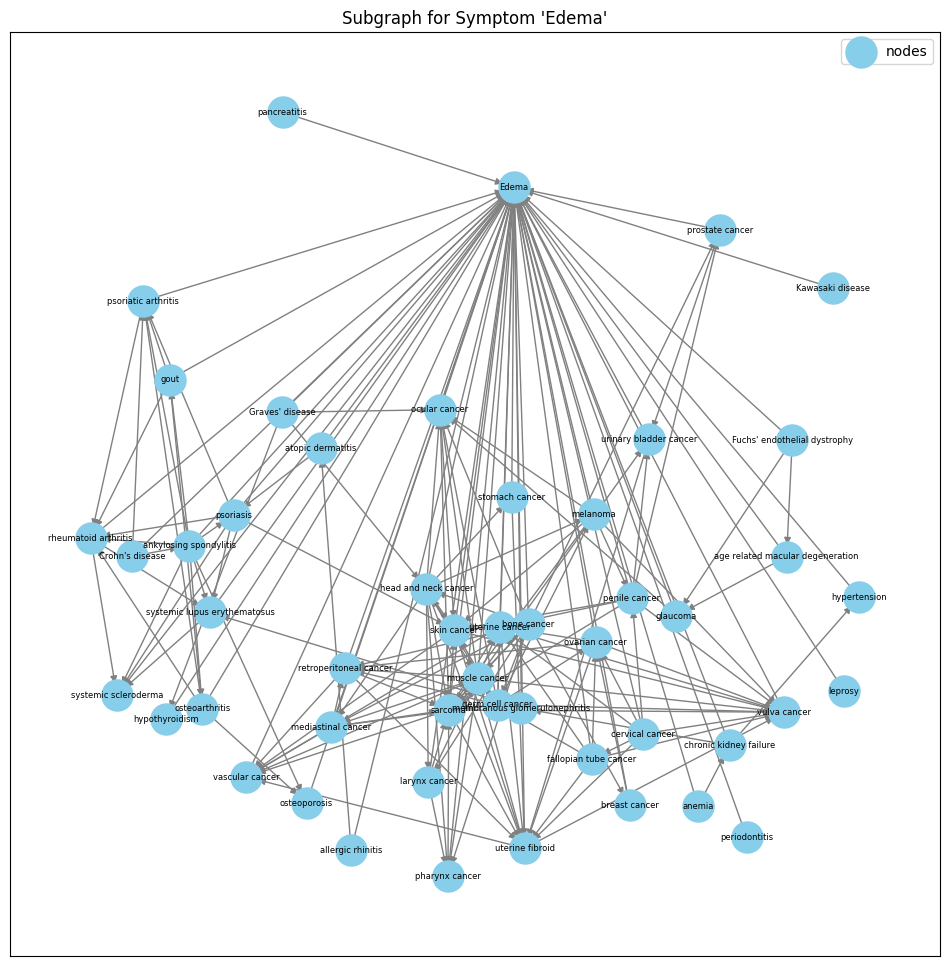

In [37]:
import matplotlib.pyplot as plt
import networkx as nx

def extract_and_visualize_subgraph(G, symptom_name):
    # Find the node ID for the symptom
    symptom_id = next((node for node, attrs in G.nodes(data=True) if attrs.get('name') == symptom_name and attrs.get('kind') == 'Symptom'), None)
    
    if not symptom_id:
        print(f"No symptom found with the name '{symptom_name}'.")
        return

    # Get the subgraph for "Edema" and its immediate neighbors
    neighbors = list(G.predecessors(symptom_id)) + list(G.successors(symptom_id))
    neighbors.append(symptom_id)  # Include "Edema" in the subgraph
    subgraph = G.subgraph(neighbors)

    # Draw the subgraph
    pos = nx.spring_layout(subgraph)  # positions for all nodes
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(subgraph, pos, node_size=500, node_color='skyblue', label='nodes')
    nx.draw_networkx_edges(subgraph, pos, edgelist=subgraph.edges(), edge_color='gray')
    nx.draw_networkx_labels(subgraph, pos, labels={n: G.nodes[n]['name'] for n in subgraph.nodes()}, font_size=6)  # Smaller font size
    plt.title("Subgraph for Symptom 'Edema'")
    plt.legend()
    plt.show()

# Assuming H is your directed graph
extract_and_visualize_subgraph(H, "Edema")



In [18]:
# Function to find the node ID by the name and kind
def find_node_id_by_name_and_kind(H, name, kind):
    for node, attrs in H.nodes(data=True):
        if attrs.get('name') == name and attrs.get('kind') == kind:
            return node
    return None

# Finding the node ID for "Edema" which is a symptom
node_id_edema = find_node_id_by_name_and_kind(H, "Edema", "Symptom")
print(f"Node ID for 'Edema': {node_id_edema}")

# Function to find the most connected side effect connected to a symptom node
def find_most_connected_disease(H, symptom_node_id):
    if not symptom_node_id:
        return "Symptom node not found", 0

    disease_degrees = {}
    # Check all connected nodes and assess if they are side effects
    for neighbor in set(H.successors(symptom_node_id)) | set(H.predecessors(symptom_node_id)):
        if H.nodes[neighbor].get('kind') == 'Disease':
            # Calculate the total connections this side effect has within the entire graph
            total_degree = H.degree(neighbor)
            disease_degrees[neighbor] = total_degree

    if not  disease_degrees:
        return "No Disease connected", 0

    # Find the side effect with the highest number of connections
    most_connected = max(disease_degrees, key= disease_degrees.get)
    return H.nodes[most_connected]['name'],  disease_degrees[most_connected]

# Analyze the most connected side effect to Edema
most_connected_side_effect, degree = find_most_connected_disease(H, node_id_edema)
print(f"The most connected Disease of Edema is {most_connected_side_effect} with a connection degree of {degree}")


Node ID for 'Edema': Symptom::D004487
The most connected Disease of Edema is breast cancer with a connection degree of 1159
